In [5]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from model import *

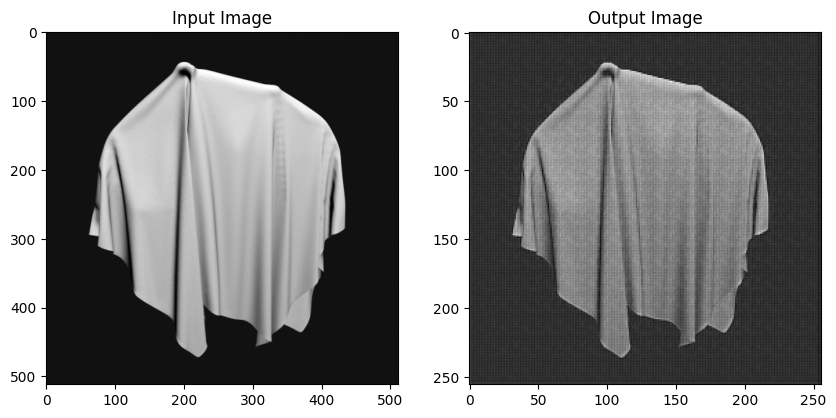

In [6]:

# Define your model architecture here
model = UNetPixelwiseRegression()

# Load the state dictionary
state_dict = torch.load('trained_model.pth')
model.load_state_dict(state_dict)
model.eval()

# Load the image
image_path = './input/100.png'
image = Image.open(image_path)

# Convert the image to a tensor
image_tensor = transforms.ToTensor()(image).unsqueeze(0)

# Make a prediction
with torch.no_grad():
    output = model(image_tensor)

# Convert the output tensor to an image without any transforms
output_image = transforms.ToPILImage()(output.squeeze().cpu())

# Display the input and output images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Output Image')

plt.show()
